In [1]:
!pip3 install pandas
!pip install beautifulsoup4 requests
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#import web requests
import requests
chocolate_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
chocolate_page = chocolate_response.content

In [4]:
#parse website with Beautiful Soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(chocolate_page, "html.parser")

In [5]:
#find all tags that contain the ratings
ratings_data = [float(rating.get_text()) for rating in soup.find_all(attrs={"class": 'Rating'})[1:]]
ratings = ratings_data

#get company data
companies = [company.get_text() for company in soup.find_all(attrs={"class": "Company"})[1:]]

#get chocolate cocoa percentage
cocoa = [float(cocoa.get_text()[:-1]) for cocoa in soup.find_all(attrs={"class": "CocoaPercent"})[1:]]
 

In [6]:
#Create a DataFrame
df = df = pd.DataFrame.from_dict({"Company": companies, "Rating": ratings, "CocoaPercentage": cocoa})

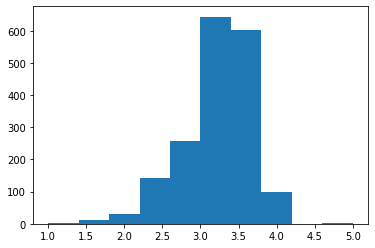

In [7]:
#histogram of ratings
plt.hist(ratings)
plt.show()

In [8]:
#Top 10 Chocolatiers
avg_ratings = df.groupby("Company").Rating.mean()
top_ten = avg_ratings.nlargest(10)
print(top_ten)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


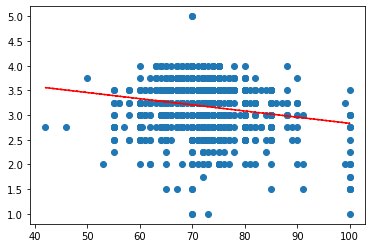

In [9]:
#scatter plot rating vs cocoa percentage
plt.scatter(df.CocoaPercentage, df.Rating)
#find correlation
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")

plt.show()
